# AMAZONE PRODUCT REVIEW ANALYSIS

## Problem Statement
Thomas, a global market analyst, wishes to develop an automated system to analyze and monitor an enormous number of reviews. By monitoring the entire review history of products, he wishes to analyze tone, language, keywords, and trends over time to provide valuable insights that increase the success rate of existing and new products and marketing campaigns.


## Product Category:----->Office Products and CD -Vinyl



#### Data loaded from
https://nijianmo.github.io/amazon/index.html

## Importing all Required libraries

In [2]:
import pandas as pd                    # to work with dataframe
import numpy as np                     # to work with numpy arrays
import gzip                            # to extract file from zip file
import json                            # to work with json file
import matplotlib.pyplot as plt        # to do visualization
import seaborn as sb                   # visualization
import re                              # regular expression
import string                          # 
import warnings                        # to avoid warnings
warnings.filterwarnings('ignore')

## Defining function for  Converting file from json to dataframe

In [2]:
def parse(path):               # creating a function 
    g = gzip.open(path, 'rb')  # opening the zip file
    for l in g:
        yield json.loads(l)

def getDF(path):             
    i = 0
    df = {}                   # creating an empty dictionary
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')


## Importing the data

### CDs and Vinyl Dataset

In [3]:
# Importing meta data
cd_meta=getDF("C:/Users/sandp/Downloads/Capstone Project/meta_CDs_and_Vinyl.json.gz")
cd_meta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[CDs & Vinyl, Christian]",,[],,Songs for the Shepherd,"[B0016CP2GS, B0000075PB, B0000275QQ, B00000I7J...",,Keith Green,[],"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,0001393774,[],[],NaN
1,"[CDs & Vinyl, Christian, Pop & Contemporary]",,[],,Lift Him Up With Ron Kenoly VHS,"[6303908845, 6303646611, B000008GO1]",,,[],"284,935 in Movies & TV (",[B00000DUDE],Movies & TV,,,,0001501348,[],[],NaN
2,"[CDs & Vinyl, Christian, Children's]",,[],,I Love You,[],,Integrity Music,[],"1,138,833 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon....",,,,0001515209,[],[],NaN
3,"[CDs & Vinyl, Christian, Children's]",,[1) To God Be The Glory2) This Is My Fathers W...,,Hymns: 16 Classic Hymns for Children,"[B00000DPLJ, B000008UPG, B00BQH9RKA, B00KYVHGR...",,Sue Gay,[],"271,064 in CDs & Vinyl (","[B00000DPLL, 0843113006, B00BQH9RKA, B000008UP...","<img src=""https://images-na.ssl-images-amazon....",,,.a-section.a-spacing-mini{margin-bottom:6px!im...,0005072298,[],[],NaN
4,"[CDs & Vinyl, Christian, Children's]",,[Joy To The World 2 The First Noel 3 Hark! The...,,Christmas Carols,"[B0010WAC50, B00000DPLJ]",,Cedarmont Kids,[],"409,293 in CDs & Vinyl (","[B00000DPKG, B0010WAC50, B00000DPKH, B00FSZPM8...","<img src=""https://images-na.ssl-images-amazon....",,,,0005121515,[],[],NaN


In [4]:
# reviews data
cd_review=getDF("C:/Users/sandp/Downloads/Capstone Project/CDs_and_Vinyl_5.json.gz")
cd_review.head()

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image
0,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5.0,"04 29, 2016",Five Stars,1461888000,NaN,NaN,NaN
1,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5.0,"02 23, 2016",One of my very favourite albums from one of my...,1456185600,NaN,NaN,NaN
2,A3SNL7UJY7GWBI,0001393774,Lady Leatherneck,True,"THank you Jesus Lord God, that brother Green's...",5.0,"02 11, 2016",Five Stars,1455148800,NaN,NaN,NaN
3,A3478QRKQDOPQ2,0001393774,jacki,True,I recall loving his other albums and maybe thi...,5.0,"11 28, 2015",forgot but I figured on some of these artists ...,1448668800,NaN,NaN,NaN
4,A23M5VTSN2C3H1,0001393774,Caliope,True,Keith Green was a pioneer in the field of Chri...,5.0,"12 16, 2014",and I have loved every album he did,1418688000,NaN,NaN,NaN


In [5]:
# ratings only dataset
columns=['userid','reviewerID','ratings','time']
cd_rating=pd.read_csv("C:/Users/sandp/Downloads/Capstone Project/CDs_and_Vinyl.csv",names=columns)
cd_rating.head()

,userid,reviewerID,ratings,time
0,0001393774,A171I27YBM4FL6,5.0,1461888000
1,0001393774,A1H1DL4K669VQ9,5.0,1461888000
2,0001393774,A23WIHT5886G36,5.0,1461024000
3,0001393774,A3SZNOJP8OL26X,5.0,1459296000
4,0001393774,A3V5XBBT7OZG5G,5.0,1456185600


### Merging selected features of Metadata with Reviews data 

In [6]:
cd_meta1=cd_meta[['title','category','brand','price','asin']] # selecting features

In [7]:
cd_data=pd.merge(cd_review,cd_meta1,on='asin') 
cd_data.head(3)

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image,title,category,brand,price
0,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5.0,"04 29, 2016",Five Stars,1461888000,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,
1,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5.0,"02 23, 2016",One of my very favourite albums from one of my...,1456185600,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,
2,A3SNL7UJY7GWBI,0001393774,Lady Leatherneck,True,"THank you Jesus Lord God, that brother Green's...",5.0,"02 11, 2016",Five Stars,1455148800,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,


### creating  subcategory column

In [18]:

cd_category= pd.DataFrame(cd_data['category'].tolist()).add_prefix('sub_cat')
cd_category.rename(columns={'sub_cat0':'subcategory1','sub_cat1':'subcategory2'}, inplace = True)

cd_category=cd_category.drop(cd_category.iloc[:,2:],axis=1)
cd_data=pd.concat([cd_data,cd_category],axis=1)
cd_data.head(2)

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image,title,category,brand,price,subcategory1,subcategory2
0,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5.0,"04 29, 2016",Five Stars,1461888000,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian
1,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5.0,"02 23, 2016",One of my very favourite albums from one of my...,1456185600,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian


### Office products dataset

In [8]:
# meta data
office_meta=getDF("C:/Users/sandp/Downloads/Capstone Project/meta_Office_Products.json.gz")
office_meta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Office Products, Office & School Supplies, Ed...","class=""a-keyvalue prodDetTable"" role=""present...",[Sequential Spelling is based on the classic O...,,Sequential Spelling Level 1 Bundle with Studen...,[],,STL Distributors,[],"[>#439,654 in Office Products (See top 100), >...","[1935943065, 1935943073, B00IJH9Q4M, 002115021...",Office Products,"class=""a-bordered a-horizontal-stripes a-spa...","August 15, 2014",$32.90,0012624861,[],[],NaN
1,"[Office Products, Office &amp; School Supplies...",,"[Unusual book, , ]",,"Mathematics, Applications and Concepts, Course...",[],,bailey,[],"3,839,628 in Books (",[],Books,,,$8.62,0078652669,[],[],NaN
2,[],"class=""a-keyvalue prodDetTable"" role=""present...",[Pearson MyHistoryLab Online Access Code for A...,,Pearson MyHistoryLab Online Access Code for Am...,[],,Pearson MyHistoryLab,[Pearson MyHistoryLab Online Access Code for A...,"[>#1,925,354 in Office Products (See top 100)]",[],Office Products,,"June 21, 2012",$0.99,0136039847,[],[],NaN
3,"[Office Products, Office & School Supplies, Ed...","class=""a-keyvalue prodDetTable"" role=""present...",[Corduroy the bear goes to the launderette wit...,,A Pocket for Corduroy,"[0140501738, 0448421917, 0670063428, 042528875...",,Ingram Book & Distributor,[9780140503524],"[>#422,894 in Office Products (See top 100), >...",[0140501738],Office Products,,"September 14, 2006",$0.95,0140503528,[],[],NaN
4,"[Office Products, Office & School Supplies, Ed...",,"[<div class=""aplus""> <div class=""leftImage"" st...",,Social Entrepreneurship: What Everyone Needs t...,"[0195334760, 1613630328, 1422104060, 158648956...",,Visit Amazon's David Bornstein Page,[],"110,732 in Books (","[0195334760, 1586489569, 1613630328, 142210406...",Books,,,,0195396332,[],[],NaN


In [9]:
# reviews data
office_review=getDF("C:/Users/sandp/Downloads/Capstone Project/Office_Products_5.json.gz")
office_review.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"11 7, 2017",A2NIJTYWADLK57,0140503528,{'Format:': ' Board book'},cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",1510012800,NaN,NaN
1,4.0,True,"03 7, 2017",A2827D8EEURMP4,0140503528,{'Format:': ' Hardcover'},emankcin,Bought this used and it came in great conditio...,Good,1488844800,NaN,NaN
2,5.0,True,"06 25, 2016",APB6087F4J09J,0140503528,{'Format:': ' Board book'},Starbucks Fan,Every story and book about Corduroy is Fantast...,Best Books for All Children,1466812800,NaN,NaN
3,5.0,True,"02 21, 2016",A2DHERRZIPFU7X,0140503528,{'Format:': ' Paperback'},Caitlyn Jacobson,I purchased this book for my first grade class...,Great for Math!,1456012800,NaN,NaN
4,5.0,False,"08 2, 2015",A2XCLJRGFANRC,0140503528,{'Format:': ' Hardcover'},E. Ervin,Having spent numerous years in an elementary s...,Love Corduroy,1438473600,NaN,NaN


In [10]:
office_rating=pd.read_csv("C:/Users/sandp/Downloads/Capstone Project/Office_Products.csv",names=columns)
office_rating.head()

,userid,reviewerID,ratings,time
0,0140503528,A2WJLOXXIB7NF3,3.0,1162512000
1,0140503528,A1RKICUK0GG6VF,5.0,1147132800
2,0140503528,A1QA5E50M398VW,5.0,1142035200
3,0140503528,A3N0HBW8IP8CZQ,5.0,980294400
4,0140503528,A1K1JW1C5CUSUZ,5.0,964915200


### Merging selected features of meta data with reviews data

In [11]:
office_meta1=office_meta[['title','category','brand','price','asin']]

In [12]:
office_data=pd.merge(office_review,office_meta1,on='asin',how='inner')
office_data.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,title,category,brand,price
0,4.0,True,"11 7, 2017",A2NIJTYWADLK57,0140503528,{'Format:': ' Board book'},cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",1510012800,NaN,NaN,A Pocket for Corduroy,"[Office Products, Office & School Supplies, Ed...",Ingram Book & Distributor,$0.95
1,4.0,True,"03 7, 2017",A2827D8EEURMP4,0140503528,{'Format:': ' Hardcover'},emankcin,Bought this used and it came in great conditio...,Good,1488844800,NaN,NaN,A Pocket for Corduroy,"[Office Products, Office & School Supplies, Ed...",Ingram Book & Distributor,$0.95
2,5.0,True,"06 25, 2016",APB6087F4J09J,0140503528,{'Format:': ' Board book'},Starbucks Fan,Every story and book about Corduroy is Fantast...,Best Books for All Children,1466812800,NaN,NaN,A Pocket for Corduroy,"[Office Products, Office & School Supplies, Ed...",Ingram Book & Distributor,$0.95


### Creating  Subcategory columns from category

In [17]:
office_category= pd.DataFrame(office_data['category'].tolist()).fillna('').add_prefix('sub_cat')
office_category.rename(columns={'sub_cat0':'subcategory1','sub_cat1':'subcategory2'}, inplace = True)

office_category=office_category.drop(office_category.iloc[:,2:],axis=1)
office_data=pd.concat([office_data,office_category],axis=1)
office_data.head(2)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,title,category,brand,price,subcategory1,subcategory2
0,4.0,True,"11 7, 2017",A2NIJTYWADLK57,0140503528,{'Format:': ' Board book'},cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",1510012800,NaN,NaN,A Pocket for Corduroy,"[Office Products, Office & School Supplies, Ed...",Ingram Book & Distributor,$0.95,Office Products,Office & School Supplies
1,4.0,True,"03 7, 2017",A2827D8EEURMP4,0140503528,{'Format:': ' Hardcover'},emankcin,Bought this used and it came in great conditio...,Good,1488844800,NaN,NaN,A Pocket for Corduroy,"[Office Products, Office & School Supplies, Ed...",Ingram Book & Distributor,$0.95,Office Products,Office & School Supplies


## Merging two datasets

In [19]:
datas=[cd_data,office_data]
co_data=pd.concat(datas)
co_data.head()

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image,title,category,brand,price,subcategory1,subcategory2
0,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5.0,"04 29, 2016",Five Stars,1461888000,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian
1,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5.0,"02 23, 2016",One of my very favourite albums from one of my...,1456185600,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian
2,A3SNL7UJY7GWBI,0001393774,Lady Leatherneck,True,"THank you Jesus Lord God, that brother Green's...",5.0,"02 11, 2016",Five Stars,1455148800,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian
3,A3478QRKQDOPQ2,0001393774,jacki,True,I recall loving his other albums and maybe thi...,5.0,"11 28, 2015",forgot but I figured on some of these artists ...,1448668800,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian
4,A23M5VTSN2C3H1,0001393774,Caliope,True,Keith Green was a pioneer in the field of Chri...,5.0,"12 16, 2014",and I have loved every album he did,1418688000,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian


## Data Understanding

### First 5 rows of the data set

In [20]:

co_data.head()

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image,title,category,brand,price,subcategory1,subcategory2
0,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5.0,"04 29, 2016",Five Stars,1461888000,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian
1,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5.0,"02 23, 2016",One of my very favourite albums from one of my...,1456185600,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian
2,A3SNL7UJY7GWBI,0001393774,Lady Leatherneck,True,"THank you Jesus Lord God, that brother Green's...",5.0,"02 11, 2016",Five Stars,1455148800,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian
3,A3478QRKQDOPQ2,0001393774,jacki,True,I recall loving his other albums and maybe thi...,5.0,"11 28, 2015",forgot but I figured on some of these artists ...,1448668800,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian
4,A23M5VTSN2C3H1,0001393774,Caliope,True,Keith Green was a pioneer in the field of Chri...,5.0,"12 16, 2014",and I have loved every album he did,1418688000,NaN,NaN,NaN,Songs for the Shepherd,"[CDs & Vinyl, Christian]",Keith Green,,CDs & Vinyl,Christian


### last 5 rows of the data set

In [21]:
co_data.tail()

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image,title,category,brand,price,subcategory1,subcategory2
914514,A2LBDDKZ0ISPQU,B01HEFLV4M,Tanners Mom,True,barely held 1 piece of paper. Amazon promptly...,1.0,"06 1, 2017",me thinks not,1496275200,NaN,NaN,NaN,"LJY Magnetic Clip Fridge Paper Clips Holder, P...","[Office Products, Office & School Supplies, De...",LJY,,Office Products,Office & School Supplies
914515,A30MBDOF8VZJWK,B01HEFLV4M,JenJen,True,NaN,5.0,"02 5, 2017",Clips,1486252800,NaN,NaN,[https://images-na.ssl-images-amazon.com/image...,"LJY Magnetic Clip Fridge Paper Clips Holder, P...","[Office Products, Office & School Supplies, De...",LJY,,Office Products,Office & School Supplies
914516,A2VVDFOWCEK3J2,B01HEFLV4M,mz,True,As advertised.,5.0,"12 5, 2016",Five Stars,1480896000,NaN,NaN,NaN,"LJY Magnetic Clip Fridge Paper Clips Holder, P...","[Office Products, Office & School Supplies, De...",LJY,,Office Products,Office & School Supplies
914517,A2OSQT54KTT2GJ,B01HEFLV4M,Myrna W.,True,Perfect for holding pads on the refrigerator. ...,5.0,"11 30, 2016",Five Stars,1480464000,NaN,NaN,NaN,"LJY Magnetic Clip Fridge Paper Clips Holder, P...","[Office Products, Office & School Supplies, De...",LJY,,Office Products,Office & School Supplies
914518,A1LQOTRLG8TJKB,B01HEFLV4M,Rachel,False,Does the job perfectly. Nice strong magnets.,5.0,"10 28, 2016",Nice strong magnets,1477612800,NaN,NaN,NaN,"LJY Magnetic Clip Fridge Paper Clips Holder, P...","[Office Products, Office & School Supplies, De...",LJY,,Office Products,Office & School Supplies


### checking shape of the data

In [22]:
co_data.shape

(2490410, 18)

In [23]:
print('Number of rows in the dataset:',co_data.shape[0])
print('Number of columns in the dataset:',co_data.shape[1])


Number of rows in the dataset: 2490410
Number of columns in the dataset: 18


### checking columns in the data 

In [24]:
co_data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'verified', 'reviewText',
       'overall', 'reviewTime', 'summary', 'unixReviewTime', 'style', 'vote',
       'image', 'title', 'category', 'brand', 'price', 'subcategory1',
       'subcategory2'],
      dtype='object')

### overall information about the data 

In [25]:
co_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2490410 entries, 0 to 914518
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   reviewerID      object 
 1   asin            object 
 2   reviewerName    object 
 3   verified        bool   
 4   reviewText      object 
 5   overall         float64
 6   reviewTime      object 
 7   summary         object 
 8   unixReviewTime  int64  
 9   style           object 
 10  vote            object 
 11  image           object 
 12  title           object 
 13  category        object 
 14  brand           object 
 15  price           object 
 16  subcategory1    object 
 17  subcategory2    object 
dtypes: bool(1), float64(1), int64(1), object(15)
memory usage: 344.4+ MB


### checking data types of the columns

In [26]:
co_data.dtypes

reviewerID         object
asin               object
reviewerName       object
verified             bool
reviewText         object
overall           float64
reviewTime         object
summary            object
unixReviewTime      int64
style              object
vote               object
image              object
title              object
category           object
brand              object
price              object
subcategory1       object
subcategory2       object
dtype: object

## Data Preprocessing

### Renaming  columns

In [27]:
co_data.rename(columns = {'reviewText': 'review',"overall" : "ratings","reviewTime":'date'}, inplace=True)

### Removing duplicate entries

In [30]:
co_data.drop_duplicates(["review","asin","reviewerName"], keep = "last", inplace = True)

### changing the datatype of date column

In [31]:
co_data["date"] = pd.to_datetime(co_data["date"])

### Cleaning the price column

###  Removing $ sign from price

In [32]:
co_data['price'].unique()

array(['', '$5.98', '$9.85', ..., '$266.35', '$73.56', '$146.99'],
      dtype=object)

In [33]:
co_data['price']=co_data['price'].str.replace('$','')
co_data['price'].unique()

array(['', '5.98', '9.85', ..., '266.35', '73.56', '146.99'], dtype=object)

### keeping only numeric values

In [34]:
co_data['price'] = co_data['price'].apply(lambda x: pd.to_numeric(str(x).strip("'"),errors='coerce'))

### changing the datatype of price column

In [35]:
co_data['price']=co_data['price'].astype(float) 
co_data['price'].unique()

array([   nan,   5.98,   9.85, ..., 266.35,  73.56, 146.99])

### checking null values

In [36]:
co_data.isnull().sum()

reviewerID              0
asin                    0
reviewerName          178
verified                0
review                441
ratings                 0
date                    0
summary               326
unixReviewTime          0
style              325164
vote              1503525
image             2003373
title                   0
category                0
brand                   0
price              401956
subcategory1            0
subcategory2            0
dtype: int64

### Finding the missing values in percentage

In [37]:
(co_data.isnull().sum()*100)/co_data.shape[0]

reviewerID         0.000000
asin               0.000000
reviewerName       0.008823
verified           0.000000
review             0.021860
ratings            0.000000
date               0.000000
summary            0.016160
unixReviewTime     0.000000
style             16.118133
vote              74.528596
image             99.305684
title              0.000000
category           0.000000
brand              0.000000
price             19.924655
subcategory1       0.000000
subcategory2       0.000000
dtype: float64

### Deleting Irrelevant Columns from both datasets because it contains so many null values

In [38]:
co_data.drop(['style','vote','image'],axis=1,inplace=True) 

### Imputation of price column

In [39]:
for i in range(2000):
    co_data['price'] = co_data['price'].interpolate(method = 'linear', limit = 5,limit_direction='forward')

### Dropping remaining rows with null values since it is very less

In [40]:
co_data.dropna(inplace=True)

### checking null values after preprocessing

In [41]:
co_data.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
verified          0
review            0
ratings           0
date              0
summary           0
unixReviewTime    0
title             0
category          0
brand             0
price             0
subcategory1      0
subcategory2      0
dtype: int64

## Data Exploration

''' Now we want to explore our dataset by each column.
    extract all possible information from the data set'''

### ▶ Dataset Details
This file has reviewer ID , Reviewer Name, Reviewe, Summary(obtained from Reviewe), Ratings on a scale 5, Review time

### Description of columns in the file:
● reviewerID - ID of the reviewer, e.g. A2LBDC9ZGSCAE6

● asin - ID of the product, e.g. 0000013714

● reviewerName - name of the reviewer

● review - text of the review

● ratings - rating of the product

● summary - summary of the review

● unixReviewTime - time of the review (unix time)

● date - date of the review

● Price- price of the product

●verified- whether the review is verified or not

●brand - brand of the product


### ASIN
Amazon Standard Identification Number (ASIN) is a ten-digit alphanumeric code that identifies products on Amazon. It's unique for each product and is assigned when you create a new product in Amazon's catalog.

In [44]:
co_data['asin'].value_counts()

B00006IEEV    2238
B00006IFEU    1860
B00A89YZ6S    1860
B00006IFI5    1844
B00006JNJD    1717
              ... 
B0013MTJUQ       1
B000WMEAMU       1
B000ZPDCZK       1
B000ZORT00       1
B00147TPAO       1
Name: asin, Length: 95533, dtype: int64

In [47]:
co_data['asin'].unique()

array(['0005164885', '0788602144', '0005465079', ..., 'B01H39UYBK',
       'B01H4R9M6Y', 'B01HEFLV4M'], dtype=object)

In [45]:
print("number of of unique ASIN:",len(co_data['asin'].unique()))

number of of unique ASIN: 95533


### Rating

In [46]:
rate_count=co_data['ratings'].value_counts()
rate_count

5.0    1385783
4.0     356793
3.0     144266
1.0      66851
2.0      62782
Name: ratings, dtype: int64

We can see that the ratings 5 has the highest frequency

### Brand

In [48]:
co_data['brand'].value_counts()

Avery              27096
HP                 22972
Canon              22881
Various Artists    20508
Sharpie            18628
                   ...  
PSG INC                1
Featherings            1
CSI                    1
Pocket Pen             1
Life In Balance        1
Name: brand, Length: 26138, dtype: int64

#### We can see some empty lists present in brand column wich is not identified by the isnull() function 

In [62]:
cb=co_data[co_data['brand']=='']


In [59]:
cb.index

Int64Index([   262,    263,    264,    265,    266,    267,    268,    269,
               270,    271,
            ...
            912566, 912567, 912568, 912569, 912880, 912881, 912882, 912883,
            912884, 912885],
           dtype='int64', length=9688)

### Replacing the empty lists present in brand column by 'unknown'

In [57]:
co_data['brand']=co_data['brand'].replace('','unknown')

In [63]:
cb.index

Int64Index([], dtype='int64')

### Category

In [64]:
co_data['category'].value_counts()

[CDs & Vinyl, Classic Rock, Album-Oriented Rock (AOR)]                                                                                                                                                                                                                                          85885
[CDs & Vinyl, Pop]                                                                                                                                                                                                                                                                              85746
[Office Products, Office & School Supplies, Printer Ink & Toner, Inkjet Printer Ink]                                                                                                                                                                                                            51894
[CDs & Vinyl, Rock, Progressive, Progressive Rock]                                                                    

### Checking is there any empty string present in category column

In [69]:
cat=co_data[co_data['category']=='']
cat

,reviewerID,asin,reviewerName,verified,review,ratings,date,summary,unixReviewTime,title,category,brand,price,subcategory1,subcategory2


In [68]:
cat1=co_data[co_data['category']=='[]']
cat1.index

Int64Index([], dtype='int64')

There is no empty strings in category column

### Sub category-1

In [70]:
co_data['subcategory1'].value_counts()

CDs & Vinyl        1268434
Office Products     733129
                     14912
Name: subcategory1, dtype: int64

#### We can see there is some empty values in subcategory column
#### So replacing it by interpolate method

In [78]:
for i in range(500):
 co_data['subcategory1']= co_data['subcategory1'].interpolate(method = 'pad',limit =5,limit_direction='forward')

### Sub category-2

In [73]:
co_data['subcategory2'].value_counts()

Office & School Supplies           553172
Pop                                258167
Alternative Rock                   161418
Classic Rock                       118647
Rock                               109752
Office Electronics                  91492
Country                             76473
World Music                         65886
Metal                               65320
Office &amp; School Supplies        64432
Jazz                                58574
R&B                                 58061
Classical                           54069
Dance & Electronic                  37020
Blues                               35012
Rap & Hip-Hop                       30081
Christian                           28779
Office Furniture & Lighting         23535
Broadway & Vocalists                21576
Folk                                17553
Soundtracks                         16906
                                    14912
Opera & Classical Vocal             13890
Holiday & Wedding                 

### Replacing empty values by interpolate  method

In [79]:
for i in range(500):
 co_data['subcategory2']= co_data['subcategory2'].interpolate(method = 'pad',limit =5,limit_direction='forward')

### Verified

#### Verified means review is verified or not.

In [77]:
co_data['verified'].value_counts()

True     1317989
False     698486
Name: verified, dtype: int64

In [81]:
# Saving file into csv to do further analysis
co_data.to_csv('C:/Users/sandp/Downloads/Capstone Project/final_cd_office_data.csv')

### Text preprocessing

In [5]:
# reading the saved data
df=pd.read_csv("C:/Users/sandp/Downloads/Capstone Project/final_cd_office_data.csv")

In [10]:
df.dropna(inplace=True)

In [11]:
def clean_text(text):
    """
    Return clean version of the text
    """
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("[^0-9A-Za-z\- ]+", " ", text)
    # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # Removing url
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove multiple spaces and making lowercase everything
    text = " ".join(text.split())
    text = text.lower()

    return text

In [12]:
# Calling the cleaning function for review column
df["review"] = df["review"].apply(clean_text)

In [13]:
# Calling the cleaning function for summary column
df["summary"] = df["summary"].apply(clean_text)

In [14]:
df['title']=df['title'].apply(clean_text)

In [ ]:
#!pip install textblob



In [15]:
from textblob import TextBlob

In [17]:
# creating a function to get the polarity -> 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


#creating a column for polarity:
df['polarity'] = df['review'].apply(getPolarity)


#### TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks

In [18]:
# creating a sentiment column on the basis of polarity
def GetAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiments'] = df['polarity'].apply(GetAnalysis)


In [19]:
df.head(3)

,Unnamed: 0,reviewerID,asin,reviewerName,verified,review,ratings,date,summary,unixReviewTime,title,category,brand,price,subcategory1,subcategory2,polarity,sentiments
0,13,A2LBDC9ZGSCAE6,0005164885,Kevin,True,christmas and tso just goes together like rudo...,5.0,2018-02-22,tso what more do you need to know,1519257600,christmas eve and other stories,"['CDs & Vinyl', 'Holiday & Wedding']",Trans-Siberian Orchestra,5.98,CDs & Vinyl,Holiday & Wedding,0.00,Neutral
1,14,A2ZB6AHRM0ZLLW,0005164885,Herbert B Brady jr,True,good,4.0,2018-02-14,four stars,1518566400,christmas eve and other stories,"['CDs & Vinyl', 'Holiday & Wedding']",Trans-Siberian Orchestra,5.98,CDs & Vinyl,Holiday & Wedding,0.70,Positive
2,15,A1LU1VWVVCU85F,0005164885,sharon l. wachowski,True,good sound for the holiday,5.0,2018-02-10,nice,1518220800,christmas eve and other stories,"['CDs & Vinyl', 'Holiday & Wedding']",Trans-Siberian Orchestra,5.98,CDs & Vinyl,Holiday & Wedding,0.55,Positive


In [20]:
df['sentiments'].value_counts()

Positive    1782928
Neutral      119298
Negative     113944
Name: sentiments, dtype: int64

In [21]:
# saving the file into csv
df.to_csv('C:/Users/sandp/Downloads/Capstone Project/amazone_product_data.csv')

## Data Visualization

In [3]:
Amazon_products1=pd.read_csv('C:/Users/sandp/Downloads/Capstone Project/amazone_product_data.csv')

### Univariate Analysis

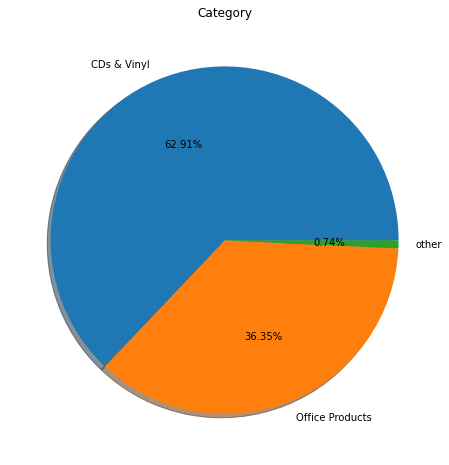

In [6]:
plt.figure(figsize=(15,8))
cat_lis=Amazon_products1["subcategory1"].value_counts()
cat_index=list(Amazon_products1["subcategory1"].value_counts().index)
plt.title("Category")
plt.pie(cat_lis,labels=cat_index,autopct='%.2f%%',shadow=True, startangle=0)
plt.show()

#### CDs & vinyl category is more in the data set

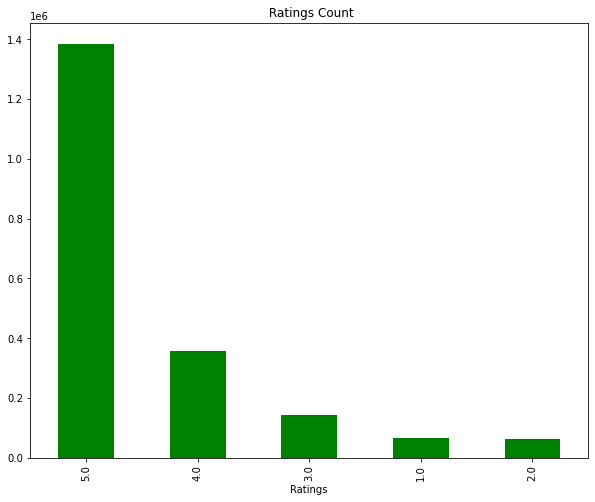

In [16]:
plt.figure(figsize=(10,8)) 
plt.title(" Ratings Count")
plt.xlabel('Ratings')
Amazon_products1['ratings'].value_counts().plot(kind='bar',color='g',align='center')
plt.show()

#### Most of the product have a rating 5

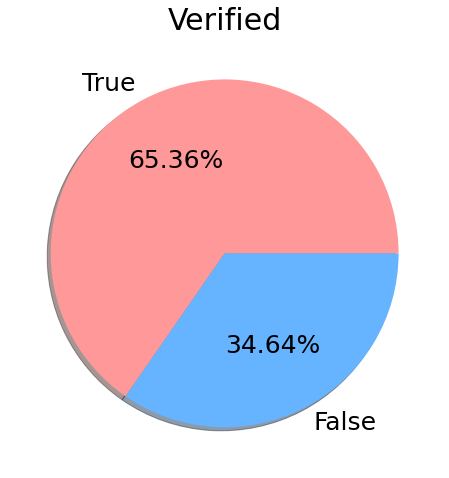

In [19]:
plt.figure(figsize=(10,8))
verified_lis=Amazon_products1["verified"].value_counts()
verified_idx=list(Amazon_products1["verified"].value_counts().index)
plt.title("Verified",fontsize=30)
textprops = {"fontsize":25}
plt.pie(verified_lis,labels=verified_idx,autopct='%.2f%%',colors = ['#ff9999','#66b3ff'],shadow=True,textprops =textprops)
plt.show()

#### We can see that Most of the reviews are verified that means the person who wrote the reviews has brought product

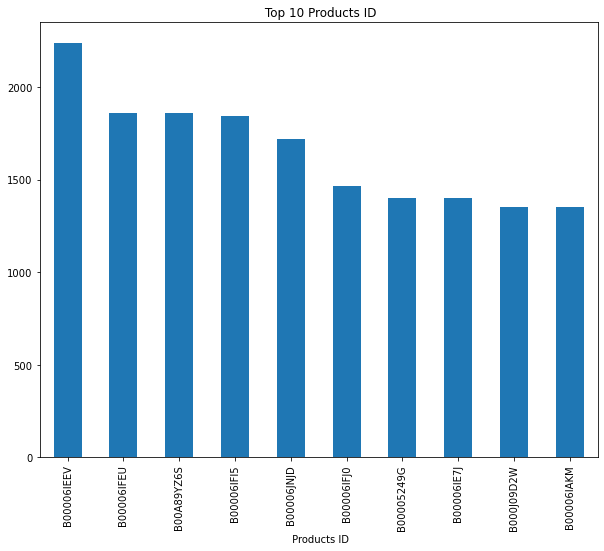

In [23]:
plt.figure(figsize=(10,8)) 
plt.title(" Top 10 Products ID")
plt.xlabel(' Products ID')
Amazon_products1['asin'].value_counts().head(10).plot(kind='bar',align='center')
plt.show()

#### The most demanding product is B00006IEEV 

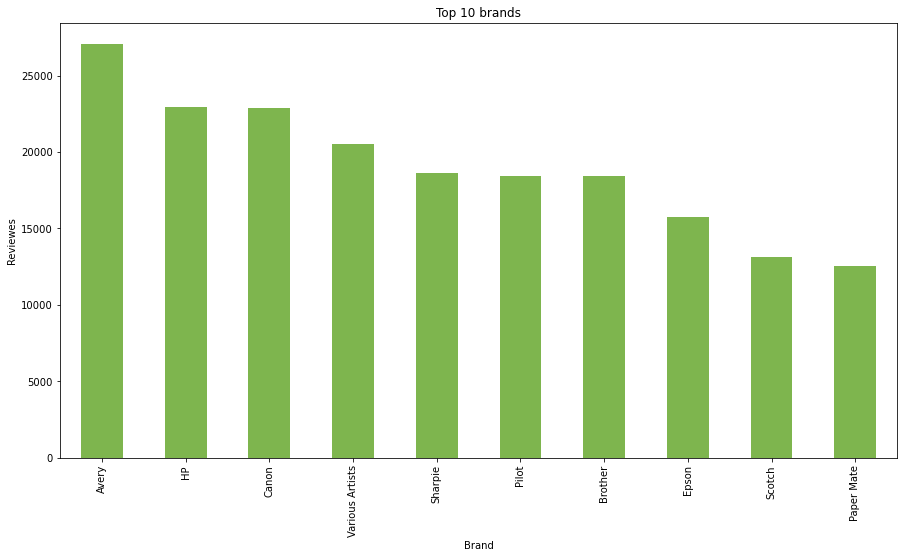

In [26]:
brand_count=Amazon_products1['brand'].value_counts().head(10)
plt.figure(figsize=(15,8))
plt.title("Top 10 brands")
plt.ylabel('Reviewes')
plt.xlabel('Brand')
brand_count.plot(kind='bar',color='#7eb54e',align='center')
plt.show()


#### Avery is the most reviewed product brand

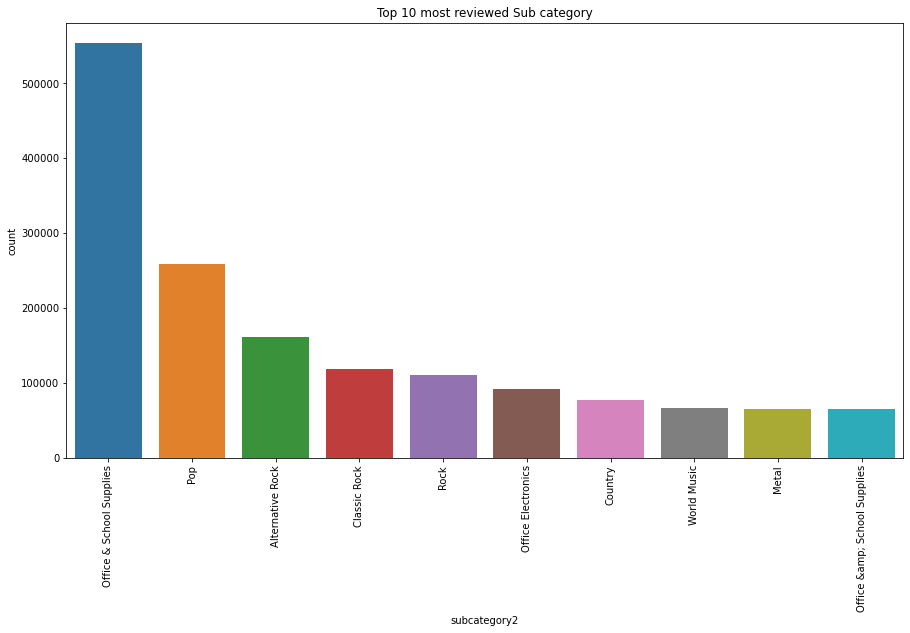

In [28]:
plt.figure(figsize=(15,8))
plt.title("Top 10 most reviewed Sub category")
plt.xticks(rotation = 90)
sb.countplot(data=Amazon_products1,x="subcategory2",order = Amazon_products1['subcategory2'].value_counts().head(10).index)
plt.show()

#### Office and School Supplies is the most reviewed sub category

### Bivariate analysis

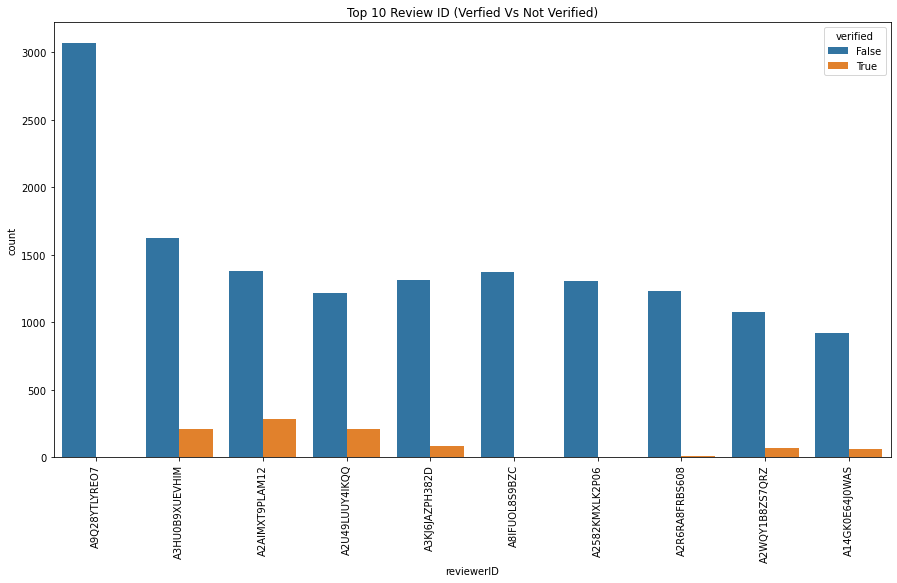

In [29]:
plt.figure(figsize=(15,8))
plt.title("Top 10 Review ID (Verfied Vs Not Verified)")
plt.xticks(rotation = 90)
sb.countplot(data=Amazon_products1,x="reviewerID",order = Amazon_products1['reviewerID'].value_counts().head(10).index,hue='verified')
plt.show()

#### Here we can see that the reviewer with id A9Q28YTLYRE07 has written more number reviews but it is not verified by the company

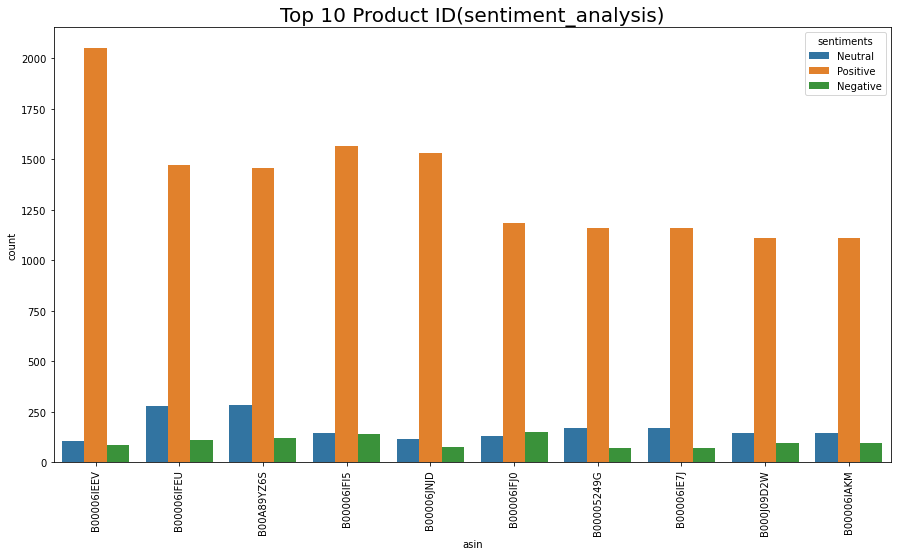

In [33]:
plt.figure(figsize=(15,8))
plt.title("Top 10 Product ID(sentiment_analysis)",fontsize=20)
plt.xticks(rotation = 90)
sb.countplot(data=Amazon_products1,x="asin",order = Amazon_products1['asin'].value_counts().head(10).index,hue='sentiments')
plt.show()

For all the 10 products have a high positive sentiment..It means these products have high positive reviews